In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM,Bidirectional,Dense,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,Adamax
import numpy as np

In [2]:
tokenizer = Tokenizer()
data = open('irish-lyrics-eof.txt').read()
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words =  len(tokenizer.word_index) + 1


In [7]:
sequences = tokenizer.texts_to_sequences(corpus)
MAX_SEQ_LENGTH = max([len(sequence) for sequence in sequences])
input_sequences =  np.array(pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH, padding='pre'))

In [9]:
X , y = input_sequences[:,:-1],input_sequences[:,-1]

In [10]:
X.shape

(1693, 15)

In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=MAX_SEQ_LENGTH-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X,y,epochs=50)

W0722 14:30:26.769533 29248 deprecation.py:323] From c:\users\koradg\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________
Train on 1693 samples
Epoch 1/50
1693/1693 [==============================] - 3s 2ms/sample - loss: 7.5914 - accuracy: 0.0224
Epoch 2/50
1693/1693 [==============================] - 2s 916us/sample - loss: 6.6835 - accuracy: 0.0236
Epoch 3/50
1693/1693 [==============================] - 1s 881us/sample - loss: 6.4414 - accuracy: 0.0236
Epoch 4/50
1693/1693 [==============

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

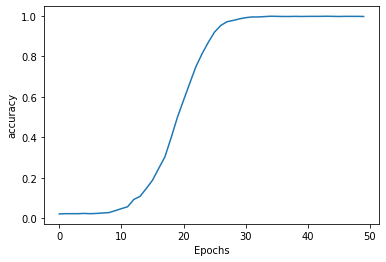

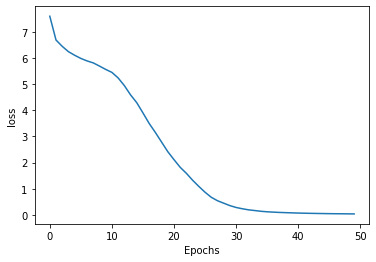

In [18]:
plot_graphs(_, 'accuracy')
plot_graphs(_, 'loss')


In [22]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=MAX_SEQ_LENGTH-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    word = tokenizer.index_word[predicted[0]]
    seed_text = seed_text+" "+word
print(seed_text)

I've got a bad feeling about this stood then then fly rest ground dream ground spleen wonder laughing laughing under grandmother eyes lies straight straight bide play more in town be be by by town said said tree said sea sea fray breast in in town tree sea down down down down green green ground lass lass ra clare clare hearted plight known may may sent sent sent sent li friend dying dying sea sea sea more over more by fair fair sing weather sailing sailing snare mooncoin jolly boy fair fair fair be be by in fair sing dream still still entangled born him fray be
